<a href="https://colab.research.google.com/github/JoaoVitorrCnr/AM-Unidade3/blob/main/ProjetoFinalColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib

df = sns.load_dataset('mpg')
df = df.dropna()
colunas_usadas = ['mpg', 'horsepower', 'weight', 'acceleration']
X = df[colunas_usadas]

print("Amostra dos dados técnicos:")
print(X.head())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

X['Cluster'] = kmeans.labels_
print("\n--- MÉDIA TÉCNICA DE CADA GRUPO ---")
print(X.groupby('Cluster').mean())
print("-" * 50)

joblib.dump(kmeans, 'modelo_carros.pkl')
joblib.dump(scaler, 'scaler_carros.pkl')


Amostra dos dados técnicos:
    mpg  horsepower  weight  acceleration
0  18.0       130.0    3504          12.0
1  15.0       165.0    3693          11.5
2  18.0       150.0    3436          11.0
3  16.0       150.0    3433          12.0
4  17.0       140.0    3449          10.5

--- MÉDIA TÉCNICA DE CADA GRUPO ---
               mpg  horsepower       weight  acceleration
Cluster                                                  
0        21.383226   97.767742  2970.432258     16.203871
1        14.528866  161.804124  4143.969072     12.641237
2        31.907857   72.164286  2177.364286     16.817143
--------------------------------------------------


/tmp/ipython-input-2940808319.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.labels_


['scaler_carros.pkl']

------------------------------
 RESULTADOS DA VALIDAÇÃO:
Erro Médio (MAE): R$ 1416.97
Precisão (R²): 73.73%
------------------------------


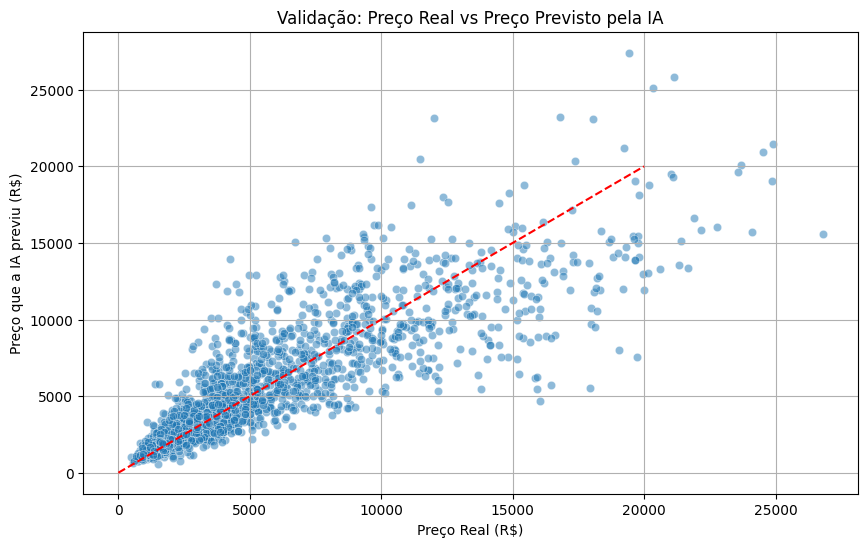


Arquivos salvos!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib


url = "https://raw.githubusercontent.com/Nitin-Rana/house-rent-estimate/master/houses_to_rent_v2.csv"
df = pd.read_csv(url)
df.columns = [c.lower().strip() for c in df.columns]

df['total'] = df['rent'] + df['hassoc_tax'] + df['prop_tax'] + df['fire_insur']
df.rename(columns={
    'city': 'Cidade', 'area': 'Area', 'rooms': 'Quartos',
    'bathroom': 'Banheiros', 'parking spaces': 'Vagas',
    'furniture': 'Mobilia', 'hassoc_tax': 'Condominio',
    'total': 'Total'
}, inplace=True)

df = df[['Cidade', 'Area', 'Quartos', 'Banheiros', 'Vagas', 'Mobilia', 'Condominio', 'Total']]
df = df[df['Total'] < 50000]

df['Mobilia'] = df['Mobilia'].apply(lambda x: 1 if x == 'furnished' else 0)
df_final = pd.get_dummies(df, columns=['Cidade'])

X = df_final.drop('Total', axis=1)
y = df_final['Total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)


previsoes = modelo.predict(X_test)
mae = mean_absolute_error(y_test, previsoes)
r2 = r2_score(y_test, previsoes)

print("-" * 30)
print(f" RESULTADOS DA VALIDAÇÃO:")
print(f"Erro Médio (MAE): R$ {mae:.2f}")
print(f"Precisão (R²): {r2:.2%}")
print("-" * 30)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=previsoes, alpha=0.5)
plt.plot([0, 20000], [0, 20000], color='red', linestyle='--')
plt.title('Validação: Preço Real vs Preço Previsto pela IA')
plt.xlabel('Preço Real (R$)')
plt.ylabel('Preço que a IA previu (R$)')
plt.grid(True)
plt.show()

joblib.dump(modelo, 'modelo_aluguel.pkl')
joblib.dump(X.columns, 'colunas_aluguel.pkl')
print("\nArquivos salvos!")

In [ ]:
from google.colab import files

files.download('modelo_aluguel.pkl')
files.download('colunas_aluguel.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>